In [ ]:
# torch with cuda
# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [ ]:
# %reload_ext autoreload
# %autoreload 2
# %matplotlib inline

In [9]:
from ultralytics import YOLO
import torch
import os

# Load a model
# model = YOLO("best.onnx")
yolo_model = YOLO("yolo11n.pt")

path = os.path.join(os.path.abspath("."),"License Plate Recognition.v6i.yolov11.zip")

# # Train the model
# train_results = model.train(
#     data=path,  # path to dataset YAML
#     epochs=100,  # number of training epochs
#     # workers=100,
#     # patience=20,
#     imgsz=640,  # training image size
#     device="cuda" if torch.cuda.is_available() else "cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
# )

# # Evaluate model performance on the validation set
# metrics = model.val()

# # Export the model to ONNX format
# path = model.export(format="onnx")  # return path to exported model

In [10]:
import cv2
from matplotlib import pyplot as plt
from safe_video import NumberPlateRecognition

rec = NumberPlateRecognition()

def run(img):
    rec.analyze(img)

# Perform object detection on an image
img = cv2.imread("example.jpg")
run(img)
img = cv2.flip(img, 0)
run(img)
img = cv2.flip(img, 1)
run(img)
img = cv2.flip(img, 0)
run(img)


0: 448x640 4 License_Plates, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 2 License_Plates, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 2 License_Plates, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 5 License_Plates, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


In [5]:
import cv2
import os
import numpy as np
import torch
from matplotlib import pyplot as plt
from ultralytics import YOLO

model_path = os.path.join(os.path.abspath("."),"models","first10ktrain","weights","best.onnx")
model = YOLO(model_path, task='detect')

def add_noise(bboxes, mean=0, std_dev=5):
    noise = np.random.normal(mean, std_dev, bboxes.shape)
    noisy_bboxes = bboxes + noise
    return noisy_bboxes

def extract_bboxes(results):
    #bounding boxes can be extracted like that:
    bboxes = results[0].boxes.xyxy.cpu().numpy()
    return bboxes
    #trying to add noise and add it on the picture (doesn't work yet)
    # noisy_bboxes = add_noise(bboxes)
    # results[0].boxes.xyxy = torch.tensor(noisy_bboxes, device=results[0].boxes.xyxy.device)

    return results

# Perform object detection on an image
img = cv2.imread("example.jpg")
results = model(img)

# print(extract_bboxes(results))
# print(results[0].boxes.cpu().numpy())
# print(results[0])
# results[0].show()

Loading d:\uni\Semester_5\Praktikum\NumberPlateRecognition\models\first10ktrain\weights\best.onnx for ONNX Runtime inference...
Preferring ONNX Runtime TensorrtExecutionProvider
*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************

0: 640x640 4 License_Plates, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



0: 448x640 4 License_Plates, 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


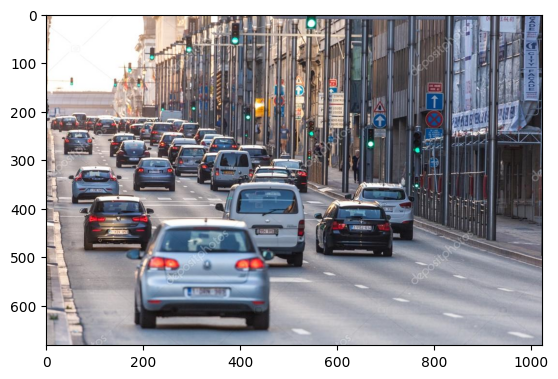

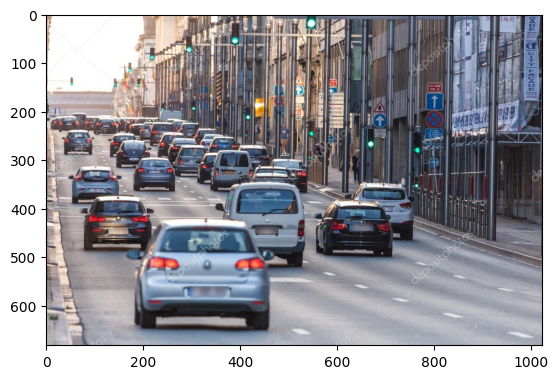

In [40]:
from safe_video import NumberPlateRecognition
import cv2

rec = NumberPlateRecognition()
#img = cv2.imread("example.jpg")
img = cv2.imread("example.jpg")
img = img[:, :, ::-1]



analyzed_img = rec.analyze(img)
result = rec.blur_image(img, analyzed_img.boxes)



plt.imshow(img)
plt.show()
plt.imshow(result)
plt.show()
# original = Image.fromarray(img, 'RGB')
# result2 = Image.fromarray(result, 'RGB')

In [ ]:
#rec.result.show()




0: 448x640 15 cars, 3 traffic lights, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict

0: 448x640 14 cars, 3 traffic lights, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 1 License_Plate, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


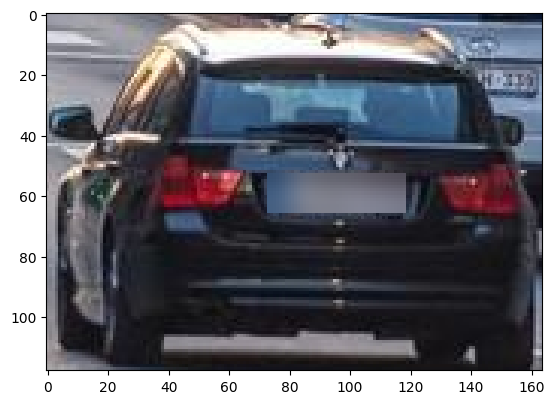

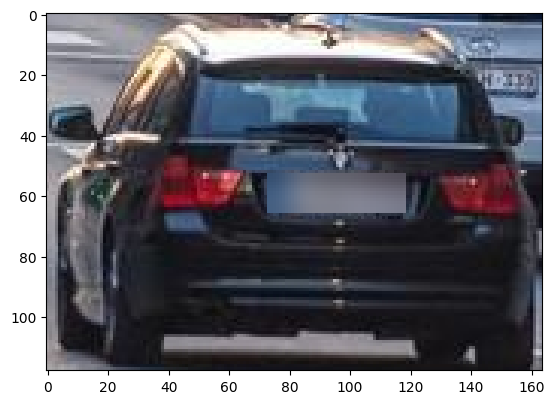


0: 544x640 2 License_Plates, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)


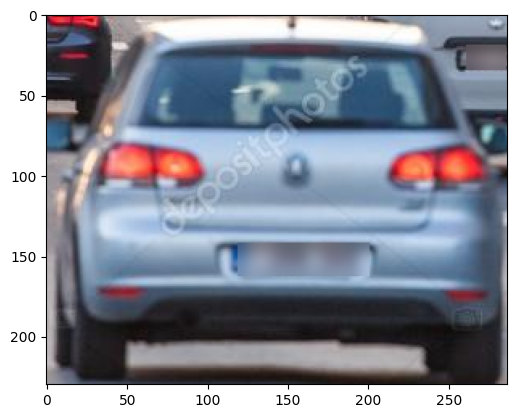

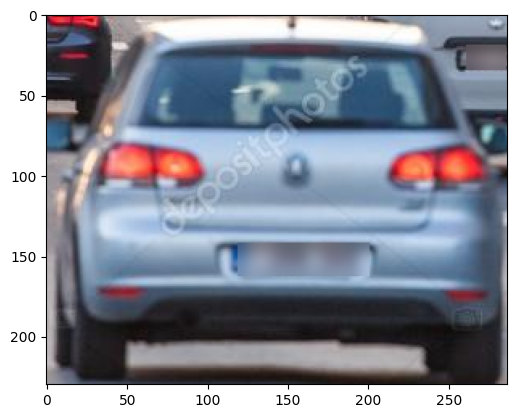


0: 512x640 1 License_Plate, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)


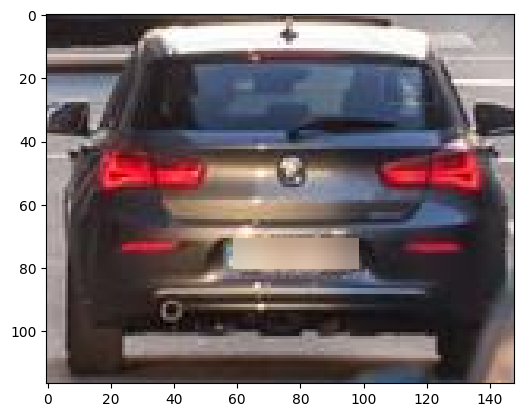

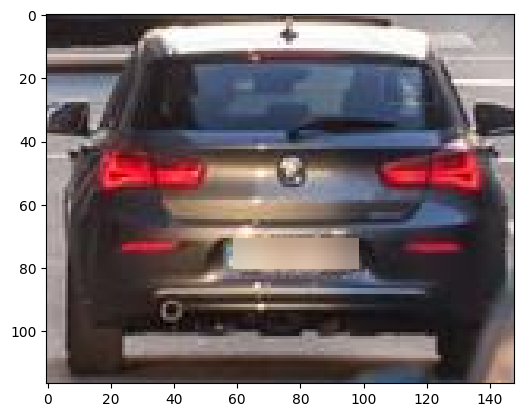


0: 640x608 1 License_Plate, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 608)


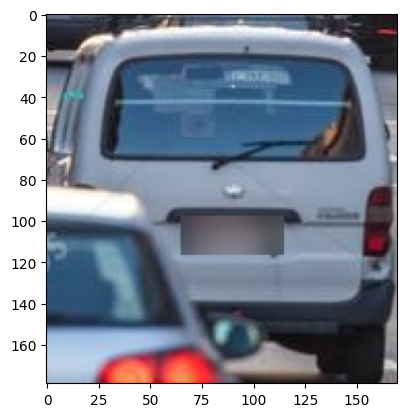

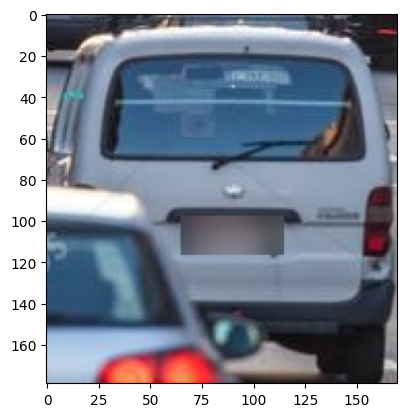


0: 512x640 1 License_Plate, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)


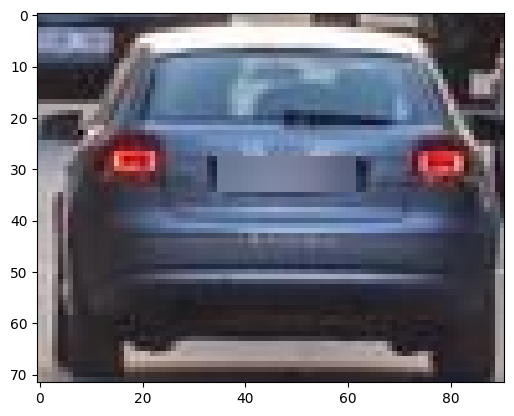

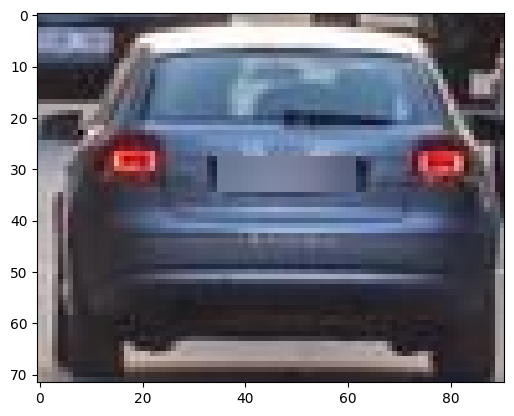


0: 608x640 2 License_Plates, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)


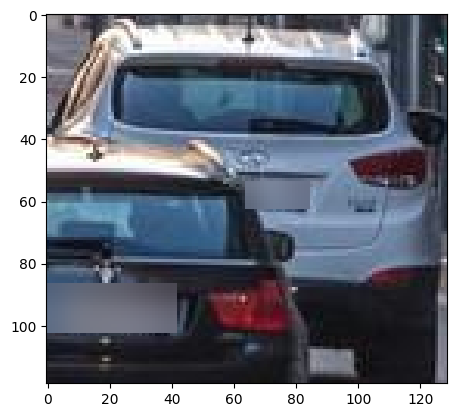

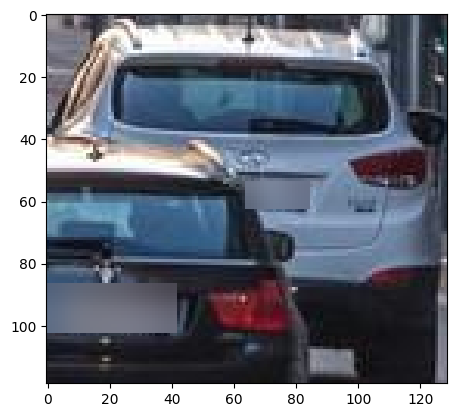


0: 608x640 1 License_Plate, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)


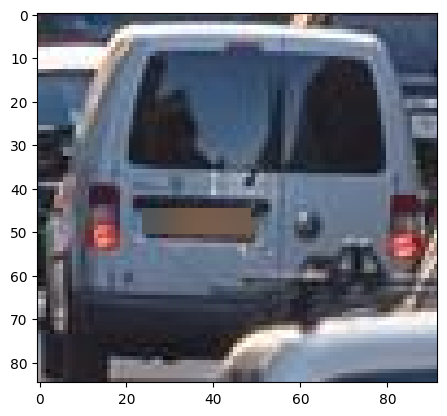

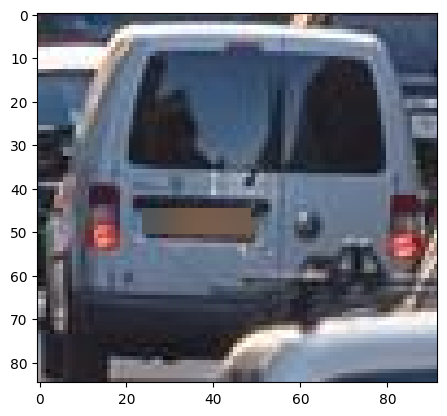


0: 512x640 1 License_Plate, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)


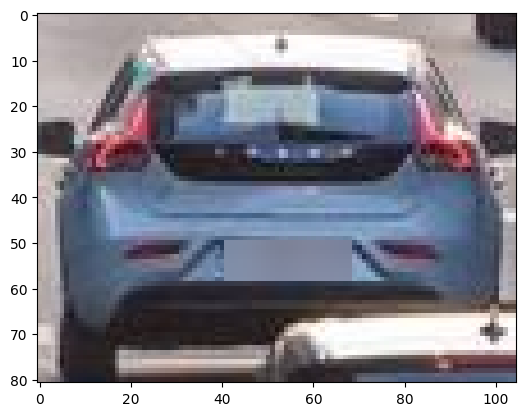

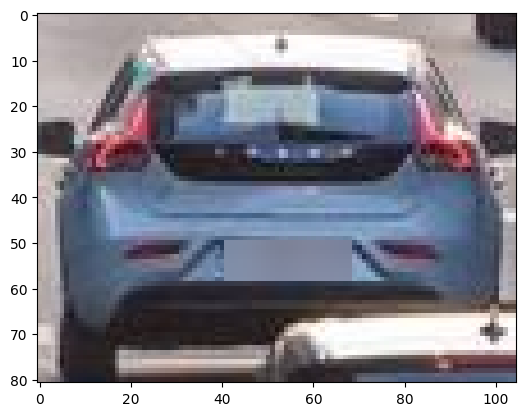


0: 640x448 (no detections), 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)


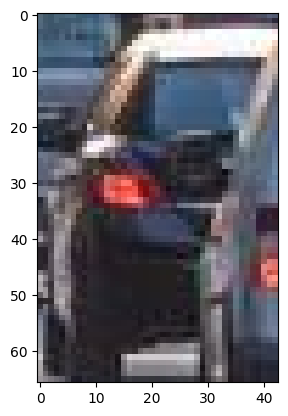

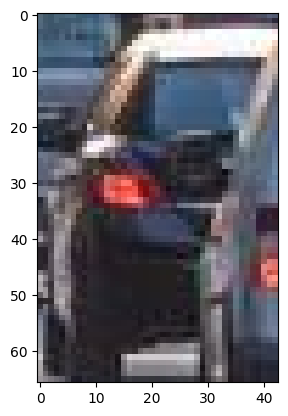


0: 640x640 (no detections), 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


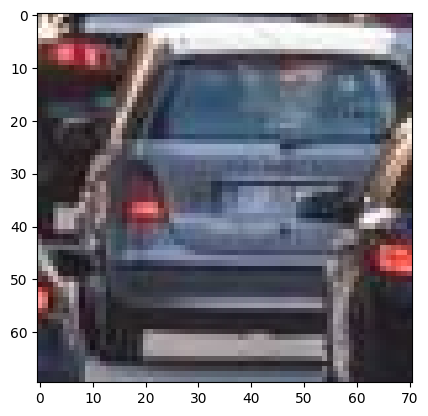

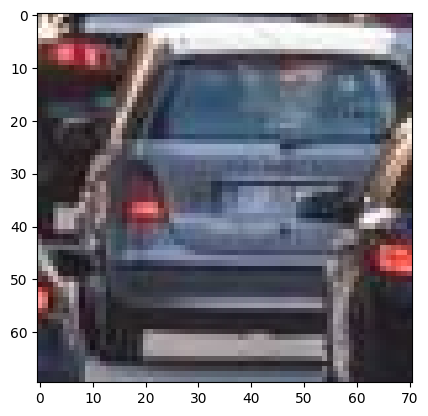


0: 608x640 1 License_Plate, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)


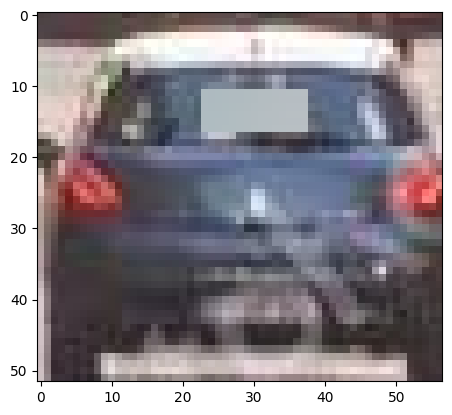

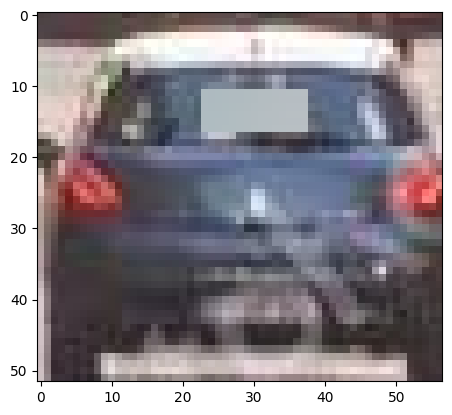


0: 608x640 1 License_Plate, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)


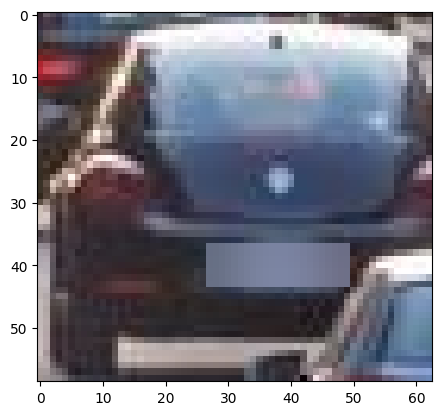

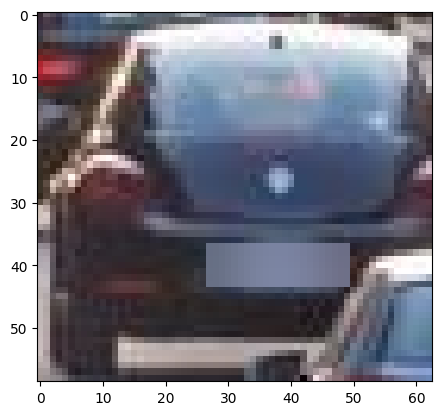


0: 256x640 (no detections), 17.0ms
Speed: 0.0ms preprocess, 17.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 640)


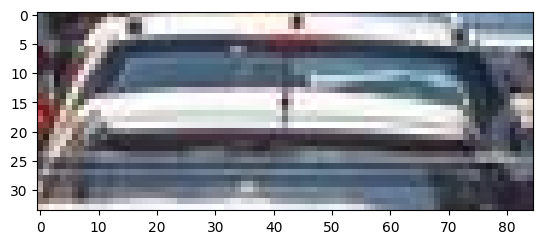

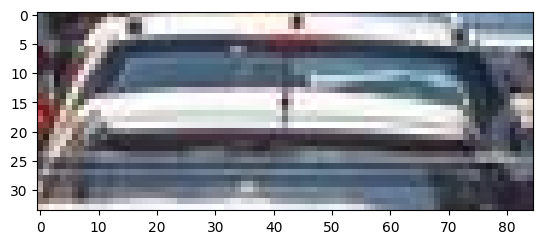


0: 576x640 (no detections), 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 640)


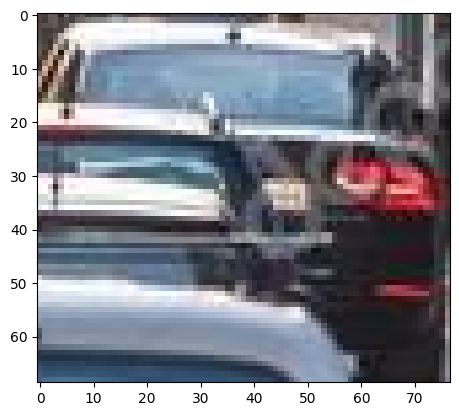

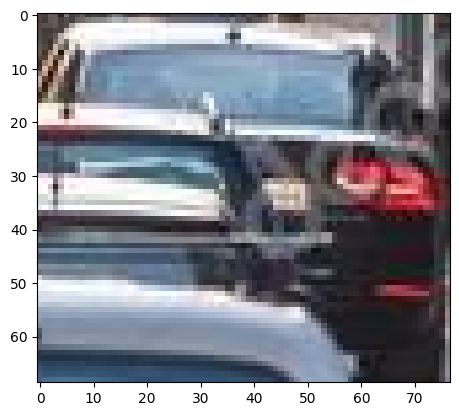

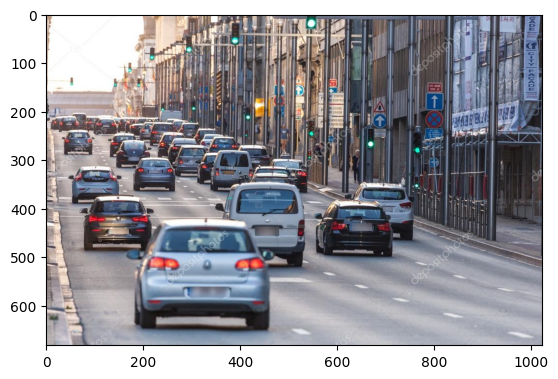

In [ ]:
from ultralytics.engine.results import Boxes
image = cv2.imread("example.jpg")
image = image[:, :, ::-1]
car_class_id = 2 # maybe switch to searching algo to find car == 2 if the library changes the class id


def analyze2(image):
    result = yolo_model(image)[0]
    data: Boxes = result.boxes.cpu().numpy()
    return (data.xyxy,data.conf,data.cls,result.names)


car_boxes = yolo_model.predict(img, save = True)
xyxy,conf,cls,names = analyze2(image)
car_boxes_coordinates = xyxy[cls == car_class_id]
car_boxes_conf = conf[cls == car_class_id]


# test for one boundig box
# cropped_image = image[int(car_boxes_coordinates[6][1]):int(car_boxes_coordinates[6][3]), int(car_boxes_coordinates[6][0]):int(car_boxes_coordinates[6][2])]
for i in range(len(car_boxes_coordinates)):
    x1, y1, x2, y2 = map(int, car_boxes_coordinates[i])
    cropped_image = image[y1:y2, x1:x2]
    
    plate_rec = rec.analyze(cropped_image)
    result = rec.blur_image(cropped_image, plate_rec.boxes)
    image[y1:y2, x1:x2] = result
    plt.imshow(result)
    plt.show()

plt.imshow(image)
plt.show()
# run over the hole image one last time to get the final result
# analyzed_img = rec.analyze(image)
# result = rec.blur_image(image, analyzed_img.boxes)

# # test if our function works
# plate_rec = rec.analyze(cropped_image)
# result = rec.blur_image(cropped_image, plate_rec.boxes)
# plt.imshow(cropped_image)
# plt.show()
# plt.imshow(result)
# plt.show()

# # Extract bounding box coordinates, confidence scores, and class names
# plate_bboxes = plate_rec.boxes  # Bounding box coordinates (x1, y1, x2, y2)
# plate_confidences = plate_rec.conf  # Confidence scores
# plate_classes = plate_rec.cls  # Class IDs
# plate_names = plate_rec.clslgd  # Class name mapping (ID -> name)

# # Convert the image back to BGR format
# cropped_image_bgr = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)

# # Loop through each detection and draw it on the image
# for bbox, conf, cls_id in zip(plate_bboxes, plate_confidences, plate_classes):
#     x1, y1, x2, y2 = map(int, bbox)  
#     cv2.rectangle(cropped_image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

# # Display the image with bounding boxes
# cv2.imshow("test", cropped_image_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()